<a href="https://colab.research.google.com/github/gatofeles/Trabalhos-SI202/blob/master/gameShisima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shisima**

##**O tabuleiro**

O tabuleiro deste jogo é um octágono em que os vértices opostos são interligados por linhas diagonais. Não é possível aumentar o tabuleiro deste jogo pois o único resultado disto seria o prolongamento da partida e não haveria nenhum desafio extra para estratégias. A imagem abaixo ilustra o tabuleiro.

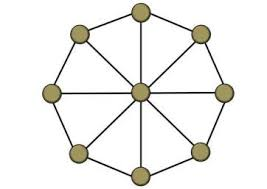

##**Regras do Jogo**

**Movimentação das peças**

Neste jogo, o posicionamento das peças é limitado aos vértices de um octágono sendo que a movimentação acontece a partir das arestas e das linhas que interligam cada vértice oposto. Também é possível posicionar as peças no centro do octágono. A imagem abaixo ilustra o tabuleiro e os possíveis posicionamentos das peças. Em cada turno um jogador realiza um movimento, sendo possível mover a peça para um ponto adjacente. Não há possibilidade de pular casas ou jogadas consecutivas.

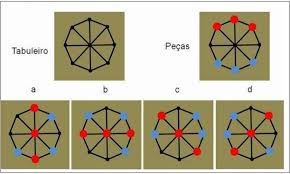

**Condições de Vitória**

Ganha o jogo o jogador que conseguir colocar três peças da mesma cor em uma fileira, como indicado nas figuras b e c na imagem abaixo. Caso a mesma jogada seja repetida 3 vezes durante o jogo, o jogo termina em empate.


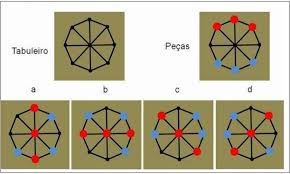

###Reperesentação do tabuleiro
Jogadores com peças brancas são representados por 1 e jogadores com peças pretas são representados por -1. Os pontoa vagos são representados por 0 e o tabuleiro possui 9 espaços.



In [33]:
import random
emptyBoard = (0,0,0,0,0,0,0,0,0)
initialBoard = (0,1,1,1,0,-1,-1,-1,0)
winnerBoard = (1, 1, 1, -1, 0, 0, 0, -1, -1)

###Vencedor
Vence o jogador que obtiver a combinação de peças posição n, posição n+4 e posição 9 (centro).

In [90]:
def winner(board):

  whiteList = []
  blackList = []

  for i in range(9):
    if board[i] == 1:
      whiteList.append(i)
    elif board[i] == -1:
      blackList.append(i)
  
  if whiteList[2] == 8 and whiteList[0] == (whiteList[1] - 4):
    return True, 1

  elif blackList[2] == 8 and blackList[0] == (blackList[1] - 4):
    return True, -1

  else:
    return False, 0

In [7]:
winner(initialBoard)

(False, 0)

###Jogadas válidas
Jogadas válidas são aquelas de campos adjacentes desocupados.

In [34]:
def validMoves(board):
  
  validWhite = []
  validBlack = []

  for i in range(len(board)):

    validTempWhite = []
    validTempBlack = []

################################################################################
#
#Verificando Jogadas válidas das peças brancas
#
################################################################################

### Caso 0
    if board[i] == 1 and i == 0:
      validTempWhite.append(i)

      if board[7] == 0:
        validTempWhite.append(7)
      else:
        validTempWhite.append(-2)

      if board[1] == 0:
        validTempWhite.append(1)
      else:
        validTempWhite.append(-2)
        
      if board[8] == 0:
        validTempWhite.append(8)
      else:
        validTempWhite.append(-2)
      
      validWhite.append(validTempWhite)


################################################################################

### Caso geral
    if board[i] == 1 and (i >= 1 and i < 7):
      validTempWhite.append(i)

      if board[i-1] == 0:
        validTempWhite.append(i-1)
      else:
        validTempWhite.append(-2)

      if board[i+1] == 0:
          validTempWhite.append(i+1)
      else:
        validTempWhite.append(-2)
       
      if board[8] == 0:
        validTempWhite.append(8)
      else:
        validTempWhite.append(-2)

      validWhite.append(validTempWhite)

################################################################################

### Caso 7
    if board[i] == 1 and i == 7:
      validTempWhite.append(i)

      if board[6] == 0:
        validTempWhite.append(6)
      else:
        validTempWhite.append(-2)

      if board[0] == 0:
        validTempWhite.append(0)
      else:
        validTempWhite.append(-2)

      if board[8] == 0:
        validTempWhite.append(8)
      else:
        validTempWhite.append(-2)
      
      validWhite.append(validTempWhite)

################################################################################

###Caso Centro
    if board[i] == 1 and i == 8:
      validTempWhite.append(i)
      for j in range(len(board)-1):
        if board[j] == 0:
          validTempWhite.append(j)
        else:
          validTempWhite.append(-2)

      validWhite.append(validTempWhite)


################################################################################
#
#Verificando Jogadas válidas das peças pretas
#
################################################################################
 
###Caso Geral  
    if board[i] == -1 and (i >= 1 and i < 7):
      validTempBlack.append(i)

      if board[i-1] == 0:
        validTempBlack.append(i-1)
      else:
        validTempBlack.append(-2)

      if board[i+1] == 0:
          validTempBlack.append(i+1)
      else:
        validTempBlack.append(-2)
       
      if board[8] == 0:
        validTempBlack.append(8)
      else:
        validTempBlack.append(-2)

      validBlack.append(validTempBlack)

################################################################################

###Caso 7
    if board[i] ==-1 and i == 7:
      validTempBlack.append(i)

      if board[6] == 0:
        validTempBlack.append(6)
      else:
        validTempBlack.append(-2)

      if board[0] == 0:
        validTempBlack.append(0)
      else:
        validTempBlack.append(-2)

      if board[8] == 0:
        validTempBlack.append(8)
      else:
        validTempBlack.append(-2)
      
      validBlack.append(validTempBlack)   

################################################################################

###Caso 0
    if board[i] == -1 and i == 0:
      validTempBlack.append(i)

      if board[7] == 0:
        validTempBlack.append(7)
      else:
        validTempBlack.append(-2)

      if board[1] == 0:
        validTempBlack.append(1)
      else:
        validTempBlack.append(-2)
        
      if board[8] == 0:
        validTempBlack.append(8)
      else:
        validTempBlack.append(-2)
      
      validBlack.append(validTempBlack)

################################################################################

###Caso Centro
    if board[i] == -1 and i == 8:
      validTempBlack.append(i)
      for j in range(len(board)-1):
        if board[j] == 0:
          validTempBlack.append(j)
        else:
          validTempBlack.append(-2)
              
      validBlack.append(validTempBlack)  

################################################################################
  validWhite.extend(validBlack)

  return validWhite

In [35]:
validMoves(initialBoard)

[[1, 0, -2, 8],
 [2, -2, -2, 8],
 [3, -2, 4, 8],
 [5, 4, -2, 8],
 [6, -2, -2, 8],
 [7, -2, 0, 8]]

###Jogador Aleatório

O jogador aleatório devera ser capaz de olhar para as peças e entender quais são seus graus de liberdade a partir da matriz de jogadas válidas retornada pela função de jogadas válidas.

In [36]:
def Player(board, turn):

  pieceMove = []
  moves = validMoves(board)
  finalMoveTurn = []

################################################################################
# Vez das Brancas
################################################################################

  if turn == 1:
    
      options = []
      while len(options) <= 0:
        pieceMove = []
        options = []

        chosenPiece = random.choice([moves[0][0], moves[1][0], moves[2][0]])

        for i in range(len(moves)):
          if chosenPiece == moves[i][0]:
            pieceMove.append(chosenPiece)

            for j in range(1,len(moves[i])):
              if moves[i][j] != -2:
                options.append(moves[i][j])

      chosenMove = random.choice(options)
      pieceMove.append(chosenMove)
    
      finalMoveTurn.extend(pieceMove)
      finalMoveTurn.append(turn)
    
      return finalMoveTurn

################################################################################
# Vez das Pretas
################################################################################
  if turn == -1:
      options = []

      while len(options) <= 0:
        pieceMove = []
        options = []

        chosenPiece = random.choice([moves[3][0], moves[4][0], moves[5][0]])

        for i in range(len(moves)):
          if chosenPiece == moves[i][0]:
            pieceMove.append(chosenPiece)

            for j in range(1,len(moves[i])):
              if moves[i][j] != -2:
                options.append(moves[i][j])

      chosenMove = random.choice(options)
      pieceMove.append(chosenMove)
    
      finalMoveTurn.extend(pieceMove)
      finalMoveTurn.append(turn)
    
      return finalMoveTurn


In [72]:
Player(initialBoard, -1)

[5, 4, -1]

###***Jogador Humano***

A função receberá o tabuleira e passará as jogadas possíveis para o jogador humano.

In [105]:
def humanPlayer(board, turn):

  pieceMove = []
  moves = validMoves(board)
  finalMoveTurn = []
  rightChoise = False
  badChoise = True
  compChosenPiece = []
  humanPossibleMoves = []

  ##Escolher peça que deseja mover

  if turn == 1:

    drawPiecesToHumans(board, True, False, turn)

    while not(rightChoise) and badChoise:
     

      humanChosenPiece = int(input("Escolha qual peça deseja mover.\n Aperte:\n 1) Para peça 1\n 2) Para peça 2\n 3) Para peça 3\n"))

      if humanChosenPiece == 1:
        compChosenPiece = moves[0]
        rightChoise = True
      elif humanChosenPiece == 2:
        compChosenPiece = moves[1]
        rightChoise = True
      elif humanChosenPiece == 3:
        compChosenPiece = moves[2]
        rightChoise = True
      
      for possibilities in compChosenPiece:
        if possibilities != -2:
          badChoise = False

      if not(rightChoise) or badChoise:
        badChoise = True
        rightChoise = False
        print("Jogada inválida ou peça sem liberdade de movitação. Escolha novamente.")

 
    rightChoise = False

    print("Ótima jogada! Agora escolha para onde deseja mover sua peça:")
    drawPiecesToHumans(board, False, True, turn)

    print("\nJogadas validas:")
    for i in range(1,len(compChosenPiece)):
      if compChosenPiece[i] != -2:
        print("\nAperte " + str(compChosenPiece[i])+ " Para mover a peça para a posição "+str(compChosenPiece[i])+".")
        humanPossibleMoves.append(compChosenPiece[i])
    
    
    while not(rightChoise):
      humanMove = int(input("Faça sua escolha: "))
      if humanMove in humanPossibleMoves:
        rightChoise = True
      else:
        print("Escolha inválida. Tente novamente.")
    
    return [moves[humanChosenPiece-1][0], humanMove, turn]


  if turn == -1:

    drawPiecesToHumans(board, True, False, turn)

    while not(rightChoise) and badChoise:
     

      humanChosenPiece = int(input("Escolha qual peça deseja mover.\n Aperte:\n 1) Para peça 1\n 2) Para peça 2\n 3) Para peça 3\n"))

      if humanChosenPiece == 1:
        compChosenPiece = moves[3]
        rightChoise = True
      elif humanChosenPiece == 2:
        compChosenPiece = moves[4]
        rightChoise = True
      elif humanChosenPiece == 3:
        compChosenPiece = moves[5]
        rightChoise = True
      
      for possibilities in compChosenPiece:
        if possibilities != -2:
          badChoise = False

      if not(rightChoise) or badChoise:
        badChoise = True
        rightChoise = False
        print("Jogada inválida ou peça sem liberdade de movitação. Escolha novamente.")

 
    rightChoise = False

    print("Ótima jogada! Agora escolha para onde deseja mover sua peça:")
    drawPiecesToHumans(board, False, True, turn)

    print("\nJogadas validas:")
    for i in range(1,len(compChosenPiece)):
      if compChosenPiece[i] != -2:
        print("Aperte " + str(compChosenPiece[i])+ " Para mover a peça para a posição "+str(compChosenPiece[i])+".")
        humanPossibleMoves.append(compChosenPiece[i])
    
    
    while not(rightChoise):
      humanMove = int(input("Faça sua escolha: "))
      if humanMove in humanPossibleMoves:
        rightChoise = True
      else:
        print("Escolha inválida. Tente novamente.")
    
    return [moves[humanChosenPiece+2][0], humanMove, turn]
  ##Escolher para onde quer mover a peça


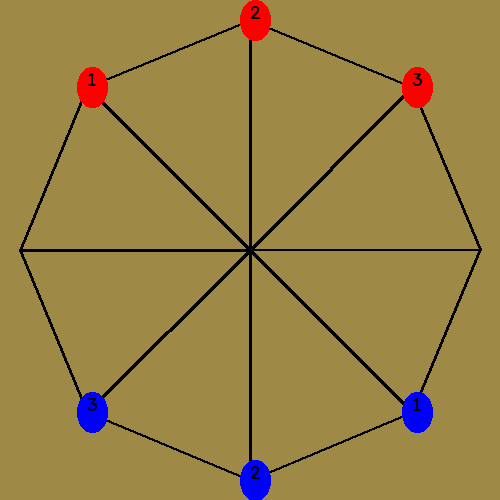

Escolha qual peça deseja mover.
 Aperte:
 1) Para peça 1
 2) Para peça 2
 3) Para peça 3
3
Ótima jogada! Agora escolha para onde deseja mover sua peça:


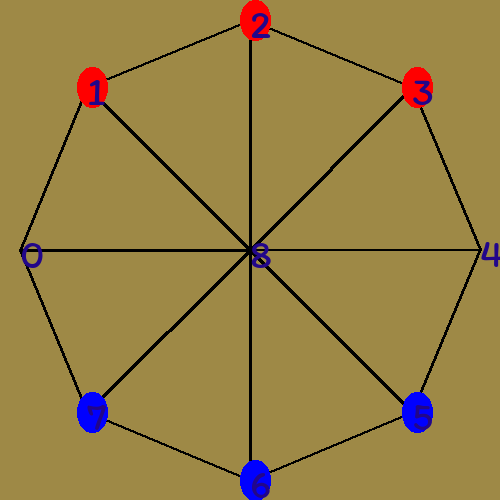

Aperte0 Para mover a peça para a posição 0.
Aperte8 Para mover a peça para a posição 8.
Faça sua escolha: 0


[3, 0, -1]

In [68]:
humanPlayer(initialBoard, -1)

###***Gerenciador do Jogo Entre Bots***

In [40]:
def Game():

  gameBoard = (0,1,1,1,0,-1,-1,-1,0)
  turn = 1
  history = []
  draw = False
  result = []

  while not(winner(gameBoard)[0]) and not(draw):
     ### Jogada 

    position = Player(gameBoard, turn)    

     ### Atualização do tabuleiro
    listBoard = list(gameBoard)
    listBoard[position[0]] = 0
    listBoard[position[1]] = position[2]
    gameBoard  = tuple(listBoard)  

     ### Registro no histórico
    history.append(gameBoard)
    gameWinner = winner(gameBoard)[1]

     ### verifica empate

     ### vira o turno
    turn *= -1
  result.append(gameWinner)
  result.append(history)
  return result


In [77]:
redVictory = 0
blueVictory = 0

for i in range(5000):
  if Game()[0] == -1:
    blueVictory += 1
  elif Game()[0] == 1:
     redVictory += 1

print("Vitória das vermelhas:", redVictory,"vezes. \nVitória das azuis:", blueVictory,"vezes.")




Vitória das vermelhas: 1245 vezes. 
Vitória das azuis: 2540 vezes.


###***Gerenciador do Jogo entre Humanos e Bots***

In [88]:
def humanGame():

  gameBoard = (0,1,1,1,0,-1,-1,-1,0)
  turn = 1
  history = []
  draw = False
  result = []
  humanTurn = True
  colorChoise = 0

  while colorChoise != 1 and colorChoise != 2:
    colorChoise = int(input("Quer jogar com qual cor de peças?\n1) Azuis\n2) Vermelhas\n"))
    if colorChoise != 1 and colorChoise != 2:
      print("Entrada inválida. Escolha uma entrada válida.")
    elif colorChoise == 1:
      humanTurn = not(humanTurn)


  while not(winner(gameBoard)[0]) and not(draw):
     ### Jogada 

    if humanTurn:
      position = humanPlayer(gameBoard, turn)
      humanTurn = not(humanTurn)

    else:
      position = Player(gameBoard, turn)
      humanTurn = not(humanTurn)


     ### Atualização do tabuleiro
    listBoard = list(gameBoard)
    listBoard[position[0]] = 0
    listBoard[position[1]] = position[2]
    gameBoard  = tuple(listBoard)
   

     ### Registro no histórico
    history.append(gameBoard)
    gameWinner = winner(gameBoard)[1]
   

     ### verifica empate

     ### vira o turno
    turn *= -1


  if turn == 1:
    print("\nVemelhas venceram!!!!!\n")
  else:
    print("\nAzuis Venceram!!!!!\n")
  
  print("Tabuleiro Vencedor")
  drawPieces(gameBoard)

  result.append(gameWinner)
  result.append(history)
  return result

###***Interface Gráfica***
Octágono equilátero


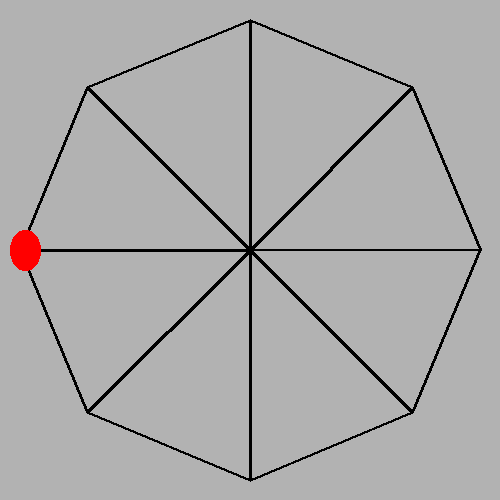

In [43]:
from PIL import Image, ImageDraw, ImageFont
import math

board = Image.new('RGB', (500, 500),  (178,178,178))

draw  = ImageDraw.Draw(board)


d = 230
coordinates = []


for angle in range(0, 360, 45):
  rx = d*math.cos(math.pi*angle/180)
  ry = d*math.sin(math.pi*angle/180)
  coordinates.append([250 - rx,250 - ry])


for i in range(len(coordinates)):
  draw.line( (250, 250, coordinates[i][0], coordinates[i][1]), 
            fill = "black", width = 3 )
  for j in range(1, len(coordinates)):
    if j == i+1 or (j == 7 and i == 0) :
      draw.line( (coordinates[i][0], coordinates[i][1], coordinates[j][0], 
                  coordinates[j][1]), fill = "black", width = 3 )
      

      
draw.ellipse([coordinates[0][0]-10, coordinates[0][1]- 20, coordinates[0][0]+20, coordinates[0][1]+20], width=25, outline = "red")

display(board)



###***Desenhar Peças***
Peças circulares brancas e pretas

In [44]:
def drawPieces(gameBoard):
  from PIL import Image, ImageDraw, ImageFont
  import math

###Desenho do tabuleiro
  board = Image.new('RGB', (500, 500),  (158,137,70))

  draw  = ImageDraw.Draw(board)

  d = 230
  coordinates = []

  for angle in range(0, 360, 45):
    rx = d*math.cos(math.pi*angle/180)
    ry = d*math.sin(math.pi*angle/180)
    coordinates.append([250 - rx,250 - ry])
  
  coordinates.append([250,250])

  for i in range(len(coordinates)):
    draw.line( (250, 250, coordinates[i][0], coordinates[i][1]), 
              fill = "black", width = 3 )
    for j in range(1, len(coordinates)):
      if j == i+1 or (j == 7 and i == 0) :
        draw.line( (coordinates[i][0], coordinates[i][1], coordinates[j][0], 
                    coordinates[j][1]), fill = "black", width = 3 )
###Desenho das peças
  for i in range(len(gameBoard)):
    
    if gameBoard[i] == 1:
      draw.ellipse([coordinates[i][0]-10, coordinates[i][1]- 20, coordinates[i][0]+20, coordinates[i][1]+20], width=25, outline = "red")
    
    if gameBoard[i] == -1:
      draw.ellipse([coordinates[i][0]-10, coordinates[i][1]- 20, coordinates[i][0]+20, coordinates[i][1]+20], width=25, outline = "blue")
  
  
    
  display(board)


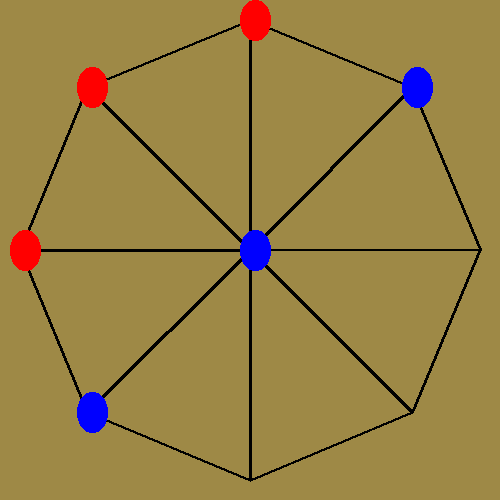

In [26]:
drawPieces((1, 1, 1, -1, 0, 0, 0, -1, -1))

###***Desenhar Peças para Humanos***

In [102]:
def drawPiecesToHumans(gameBoard, pieceTurn, boardTurn, turn):
  from PIL import Image, ImageDraw, ImageFont
  import math

  fntPieces = ImageFont.truetype("/Itim-Regular.ttf", 20)
  fntBoard = ImageFont.truetype("/Itim-Regular.ttf", 40)
  roxo = (34, 6, 138)

###Desenho do tabuleiro
  board = Image.new('RGB', (500, 500),  (158,137,70))

  draw  = ImageDraw.Draw(board)

  d = 230
  coordinates = []

  for angle in range(0, 360, 45):
    rx = d*math.cos(math.pi*angle/180)
    ry = d*math.sin(math.pi*angle/180)
    coordinates.append([250 - rx,250 - ry])
  
  coordinates.append([250,250])

  for i in range(len(coordinates)):
    draw.line( (250, 250, coordinates[i][0], coordinates[i][1]), 
              fill = "black", width = 3 )
    for j in range(1, len(coordinates)):
      if j == i+1 or (j == 7 and i == 0) :
        draw.line( (coordinates[i][0], coordinates[i][1], coordinates[j][0], 
                    coordinates[j][1]), fill = "black", width = 3 )

###Desenho das peças
  numberWhite = 1
  numberBlack = 1
  for i in range(len(gameBoard)):
    
    
    if gameBoard[i] == 1:
      draw.ellipse([coordinates[i][0]-10, coordinates[i][1]- 20, coordinates[i][0]+20, coordinates[i][1]+20], width=25, outline = "red")
      if pieceTurn and turn == 1:
        draw.multiline_text((coordinates[i][0],coordinates[i][1]-20), str(numberWhite), font=fntPieces, fill=(0, 0, 0))
        numberWhite += 1
    
    if gameBoard[i] == -1:
      draw.ellipse([coordinates[i][0]-10, coordinates[i][1]- 20, coordinates[i][0]+20, coordinates[i][1]+20], width=25, outline = "blue")
      if pieceTurn and turn == -1:
        draw.multiline_text((coordinates[i][0],coordinates[i][1]-20), str(numberBlack), font=fntPieces, fill=(0, 0, 0))
        numberBlack += 1

###Numeros no Tabuleiro
  if boardTurn:
    placingNumbers = 0
    for i in range(len(coordinates)):
      draw.multiline_text((coordinates[i][0],coordinates[i][1]-20), str(placingNumbers), font=fntBoard, fill=roxo)
      placingNumbers += 1
  

  display(board)
  


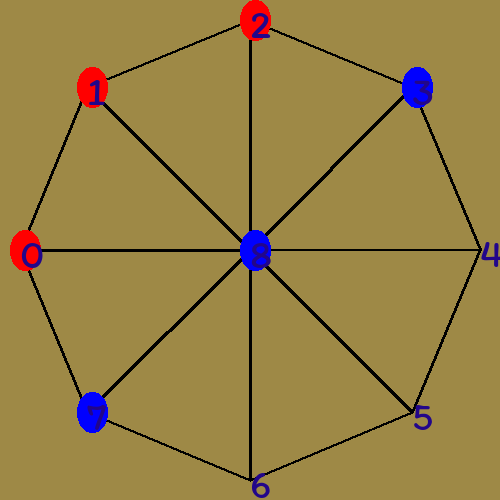

In [28]:
drawPiecesToHumans(winnerBoard, False, True)

###***Partida Completa Entre Bots***

In [46]:
from ipywidgets import interact

def display_sequence(images) :
    def _show(frame=(0, len(images)-1)) :
        return images[frame]
    return interact(_show)

In [47]:
def generate_image_history(history) :
    image_history = []
    for i in range(len(history)) :
        image_history.append( drawPieces( history[i] ) )
    return image_history

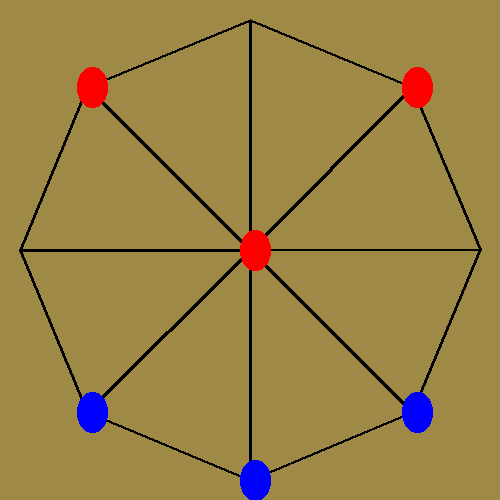

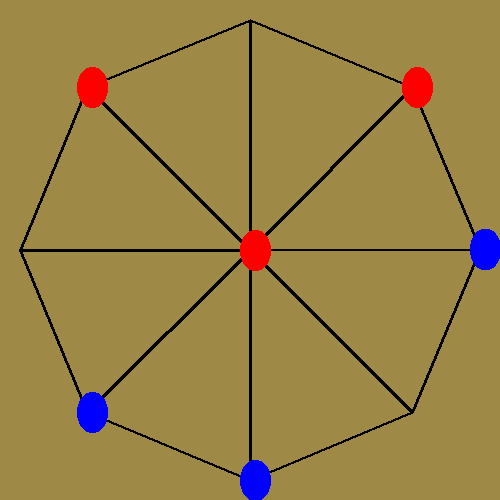

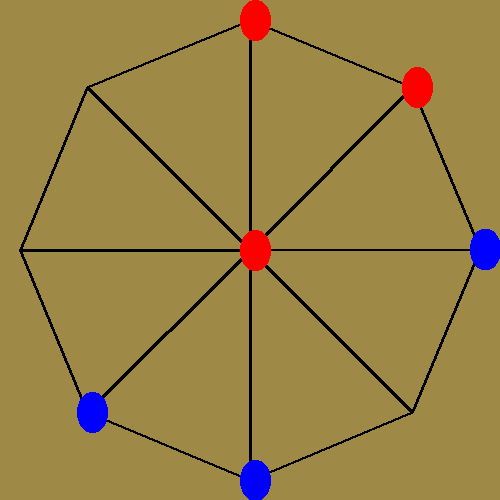

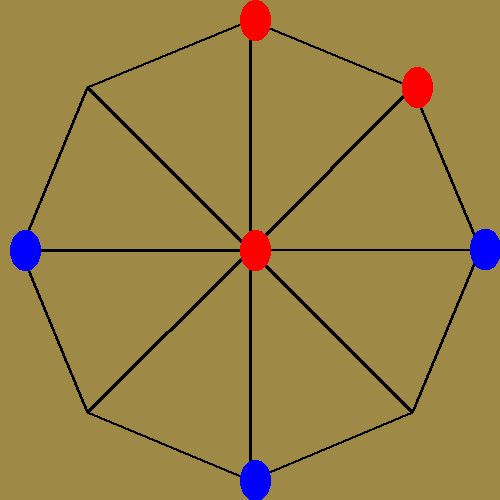

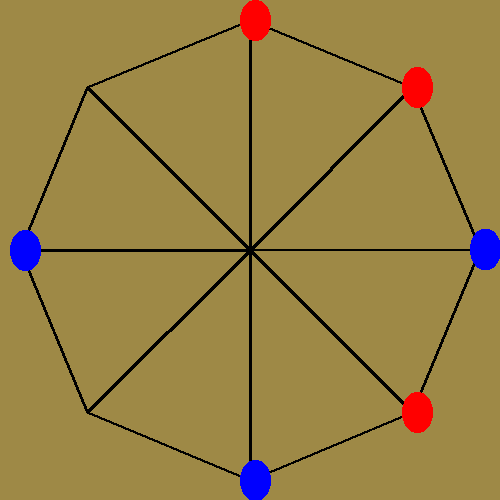

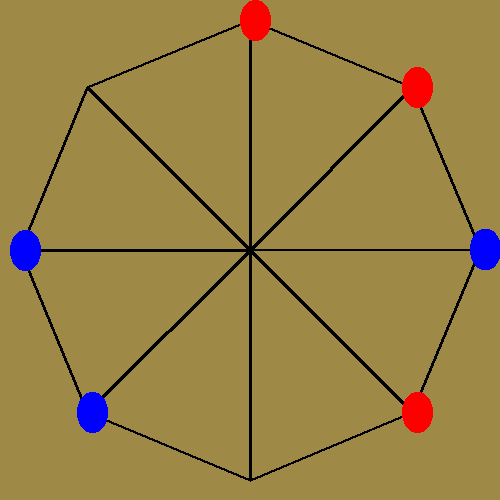

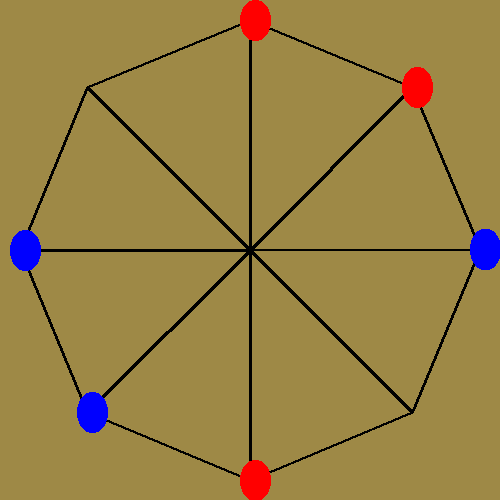

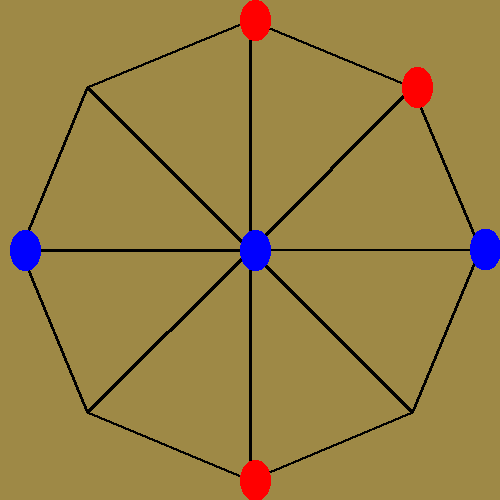

interactive(children=(IntSlider(value=3, description='frame', max=7), Output()), _dom_classes=('widget-interac…

<function __main__.display_sequence.<locals>._show>

In [48]:
history = Game()[1]
images = generate_image_history(history)
display_sequence(images)


#***Partida Completa entre Bots e Humanos***

In [107]:
humanGame()

KeyboardInterrupt: ignored